In [1]:
! pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 2.8MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.10-cp37-none-any.whl size=73269 sha256=6f9176c1a6e09298afa11e7a20455adf223bf471357494490be24191f08cdc0d
  Stored in directory: /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10
Successfully built kaggle
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"charvibannurs","key":"0084b95f8bab27fe33aa7e6cf39ef44c"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d sanikamal/rock-paper-scissors-dataset

 98% 441M/452M [00:18<00:00, 20.7MB/s]
100% 452M/452M [00:18<00:00, 26.2MB/s]


In [6]:
! unzip rock-paper-scissors-dataset.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/Rock-Paper-Scissors/train/paper/paper04-118.png  
  inflating: dataset/Rock-Paper-Scissors/train/paper/paper04-119.png  
  inflating: dataset/Rock-Paper-Scissors/train/paper/paper05-000.png  
  inflating: dataset/Rock-Paper-Scissors/train/paper/paper05-001.png  
  inflating: dataset/Rock-Paper-Scissors/train/paper/paper05-002.png  
  inflating: dataset/Rock-Paper-Scissors/train/paper/paper05-003.png  
  inflating: dataset/Rock-Paper-Scissors/train/paper/paper05-004.png  
  inflating: dataset/Rock-Paper-Scissors/train/paper/paper05-005.png  
  inflating: dataset/Rock-Paper-Scissors/train/paper/paper05-006.png  
  inflating: dataset/Rock-Paper-Scissors/train/paper/paper05-007.png  
  inflating: dataset/Rock-Paper-Scissors/train/paper/paper05-008.png  
  inflating: dataset/Rock-Paper-Scissors/train/paper/paper05-009.png  
  inflating: dataset/Rock-Paper-Scissors/train/paper/paper05-010.png  
  inflating: dataset/Rock-

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [8]:
training_path = "/content/dataset/Rock-Paper-Scissors/train"
test_path = "/content/dataset/Rock-Paper-Scissors/test"

In [9]:
dataGen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range=5,
    horizontal_flip=True,
    vertical_flip=True,
)

In [10]:
train_dataset_aug = dataGen.flow_from_directory(
    training_path,
    target_size = (200,200),
    batch_size = 32,
    shuffle=True,
    seed = 865
)

Found 2520 images belonging to 3 classes.


In [11]:
test_dataset_aug = dataGen.flow_from_directory(
    test_path,
    target_size = (200,200),
    batch_size = 32,
    shuffle=True,
    seed = 865
)

Found 372 images belonging to 3 classes.


In [12]:
CNNmodel_aug = tf.keras.models.Sequential()
# Feature extraction part
CNNmodel_aug.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200,200,3)))
CNNmodel_aug.add(tf.keras.layers.MaxPooling2D((2,2)))
CNNmodel_aug.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
CNNmodel_aug.add(tf.keras.layers.MaxPooling2D((2,2)))
CNNmodel_aug.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu'))

# Neural network - For classification
CNNmodel_aug.add(tf.keras.layers.Flatten())
CNNmodel_aug.add(tf.keras.layers.Dense(32, activation='relu'))
CNNmodel_aug.add(tf.keras.layers.Dense(64, activation='relu'))
CNNmodel_aug.add(tf.keras.layers.Dense(16, activation='relu'))
CNNmodel_aug.add(tf.keras.layers.Dense(3, activation='softmax'))

#Compile
CNNmodel_aug.compile(optimizer = 'adam',
                loss='categorical_crossentropy',metrics = ['accuracy'])

In [13]:
history2 = CNNmodel_aug.fit(train_dataset_aug, validation_data=test_dataset_aug, epochs = 5)

Epoch 1/5
79/79 [==============================] - 67s 474ms/step - loss: 1.1194 - accuracy: 0.3546 - val_loss: 0.9225 - val_accuracy: 0.5941
Epoch 2/5
79/79 [==============================] - 36s 454ms/step - loss: 0.5801 - accuracy: 0.7471 - val_loss: 0.7191 - val_accuracy: 0.6586
Epoch 3/5
79/79 [==============================] - 36s 453ms/step - loss: 0.1967 - accuracy: 0.9270 - val_loss: 0.7594 - val_accuracy: 0.7392
Epoch 4/5
79/79 [==============================] - 36s 452ms/step - loss: 0.0987 - accuracy: 0.9666 - val_loss: 0.6213 - val_accuracy: 0.7769
Epoch 5/5
79/79 [==============================] - 36s 454ms/step - loss: 0.0844 - accuracy: 0.9719 - val_loss: 0.5803 - val_accuracy: 0.8065


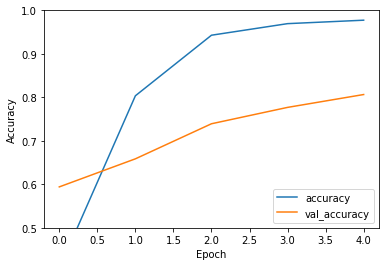

In [14]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

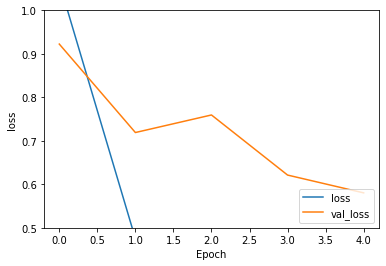

In [19]:
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [15]:
CNNmodel_aug.evaluate(test_dataset_aug)

12/12 [==============================] - 5s 372ms/step - loss: 0.5157 - accuracy: 0.8280


[0.5157231688499451, 0.8279569745063782]

In [16]:
test_dataset = dataGen.flow_from_directory(test_path, target_size=(200,200),
                                          class_mode='categorical', batch_size=32)
x_batches, y_batches= next(test_dataset)

Found 372 images belonging to 3 classes.


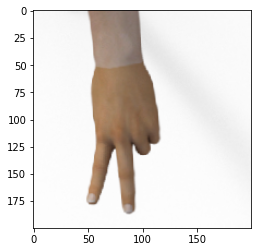

In [17]:
image = x_batches[3]
plt.imshow(image)
plt.show()

In [18]:
predicted=CNNmodel_aug.predict(test_dataset_aug)
output=np.argmax(predicted[3])
if output==0:
  print("paper")
elif output==1:
  print("rock")
else:
  print("scissors")

scissors


In [20]:
CNNmodel_aug.save('my_model.h5')